## PGE 383 HOMEWORK 6
### Daniel McAllister-Ou

Imports : 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
import scipy

Define Table 1 data:

In [13]:
Test = np.array([1, 2, 3, 4])
Pwf = np.array([403.1,394.0,378.5,362.6]) # psia
qg = np.array([4.288,9.265,15.552,20.177]) # MMscf/d    

Test1_df = pd.DataFrame({'Test': Test, 'Pwf': Pwf, 'qg': qg})
Test1_df.head()


,Test,Pwf,qg
0,1,403.1,4.288
1,2,394.0,9.265
2,3,378.5,15.552
3,4,362.6,20.177


### Question 1
Analyze AOF using empircal deliverablity equation 
- qg = C(Pavg^2 - Pwf^2)

Theoretical deliverability can be calculated using the formula:
- Pavg^2 - Pwf^2 = a*qg + b*qg^2   
or 
- (Pavg^2 - Pwf^2)/qg = a + b*qg  



Estimated deliverability constant (C): 0.0006 MMscf/d/psia^2
Estimated deliverability constants (a, b): a = -15.8643 MMscf/d, b = 0.0207 MMscf/d/psia^2


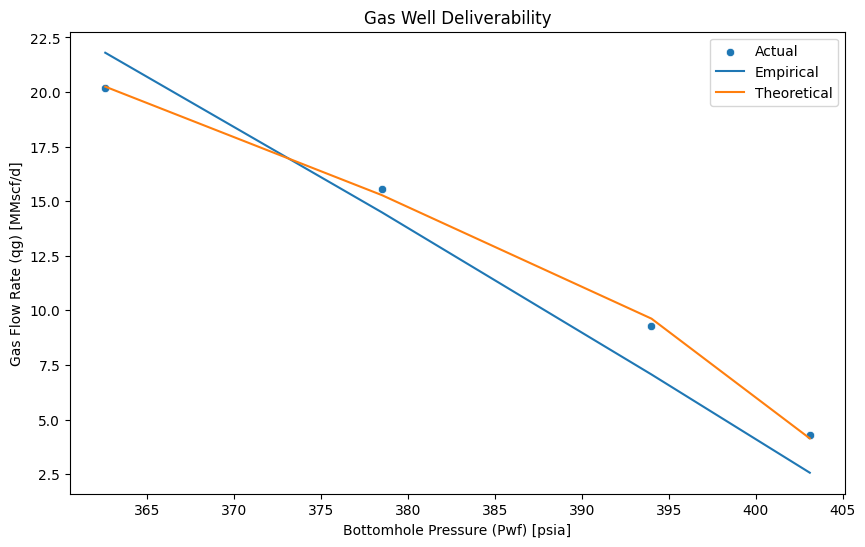

In [14]:
# Set average reservoir pressure 
Pavg = 408.2 # psia

empirical_ralationship = Pavg**2 - Pwf**2

def empirical_deliverability(x, C):
    return C * x

C_opt, _ = scipy.optimize.curve_fit(empirical_deliverability, empirical_ralationship, qg)
C = C_opt[0]
print(f"Estimated deliverability constant (C): {C:.4f} MMscf/d/psia^2")


theoretical_relationship = (Pavg**2 - Pwf**2)/qg

def theoretical_deliverability(x, a, b):
    return b * x + a

    
params_opt, _ = scipy.optimize.curve_fit(theoretical_deliverability, theoretical_relationship, qg)
a, b = params_opt
print(f"Estimated deliverability constants (a, b): a = {a:.4f} MMscf/d, b = {b:.4f} MMscf/d/psia^2")

# Plot results against each other
Test1_df['Empirical_Qg'] = empirical_deliverability(Pavg**2 - Test1_df['Pwf']**2, C)
Test1_df['Theoretical_Qg'] = theoretical_deliverability((Pavg**2 - Test1_df['Pwf']**2)/Test1_df['qg'], a, b)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pwf', y='qg', data=Test1_df, label='Actual')
sns.lineplot(x='Pwf', y='Empirical_Qg', data=Test1_df, label='Empirical')
sns.lineplot(x='Pwf', y='Theoretical_Qg', data=Test1_df, label='Theoretical')
plt.xlabel('Bottomhole Pressure (Pwf) [psia]')
plt.ylabel('Gas Flow Rate (qg) [MMscf/d]')
plt.title('Gas Well Deliverability')
plt.legend()
plt.show()



AOF:

In [15]:
def AOF_theoretical(Pavg, a, b, positive_root=True):
    """
    Solve: Pavg^2 = a*qg + b*qg^2
    
    Parameters
    ----------
    Pavg : float or array-like
        Average pressure
    a : float or array-like
        Linear coefficient
    b : float or array-like
        Quadratic coefficient
    positive_root : bool
        If True, return positive physical root
    
    Returns
    -------
    qg : ndarray or float
    """
    
    Pavg = np.asarray(Pavg)
    a = np.asarray(a)
    b = np.asarray(b)

    A = b
    B = a
    C = -Pavg**2

    discriminant = B**2 - 4*A*C

    if np.any(discriminant < 0):
        raise ValueError("Negative discriminant encountered. No real solution.")

    sqrt_disc = np.sqrt(discriminant)

    qg_pos = (-B + sqrt_disc) / (2*A)
    qg_neg = (-B - sqrt_disc) / (2*A)

    return qg_pos if positive_root else qg_neg

AOF_from_empirical = empirical_deliverability(Pavg**2, C)
AOF_from_theoretical = AOF_theoretical(Pavg, a, b)

print(f'Absolute Open Flow (AOF) from Empirical: {AOF_from_empirical:.4f} MMscf/d')
print(f'Absolute Open Flow (AOF) from Theoretical: {AOF_from_theoretical:.4f} MMscf/d')


Absolute Open Flow (AOF) from Empirical: 103.3391 MMscf/d
Absolute Open Flow (AOF) from Theoretical: 3243.5962 MMscf/d
